In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def f_getExtents(a,b,numRows,numCols):
    r1 = int(0)
    c1 = int(a*r1+b)
    r2 = int(numRows-1)
    c2 = int(a*r2+b)
    return (c1,r1),(c2,r2)

In [9]:
def f_houghLines(E):
    angles = np.deg2rad(np.arange(360)) # angles 0-360
    numRows , numCols = E.shape[0] , E.shape[1] # calculating the number of rows and columsn in image
    dMax = int((numRows**2 + numCols**2)**0.5) # max length (diagonal length) of image
    H = np.zeros((dMax,len(angles))) # Hough Matrix
    idx = np.argwhere(E) # assuming E is binary
    r , c = idx[:,0] , idx[:,1] # row = first index and column = second index
    for i in range(len(r)): # for each point in the rows
        for ang in angles:
            ri,ci = r[i] , c[i]
            di = int(ri*np.cos(ang) + ci*np.sin(ang))
            if di > 0 and di < dMax:
                H[di,int(np.rad2deg(ang))] += 1
    return H

In [10]:
E = cv2.imread(r'E.png',cv2.IMREAD_GRAYSCALE)

In [11]:
E.min(),E.max(),E.dtype

(0, 255, dtype('uint8'))

In [12]:
E = E>100 # ensuring we have a binary image

In [13]:
E.shape

(499, 1153)

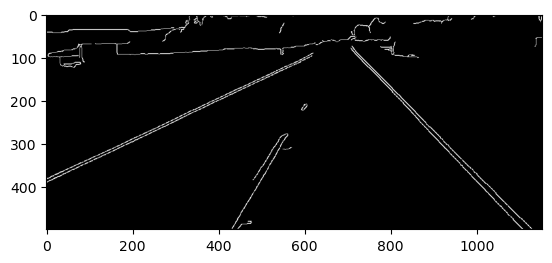

In [14]:
plt.imshow(E,cmap='gray')

In [22]:
H = f_houghLines(E)

In [23]:
idx = np.argwhere(H==H.max()) # calculating when H is maximum
best_d,best_theta = idx[0,0] , idx[0,1]

In [25]:
best_d,best_theta

(346, 25)

In [26]:
# finding a and b from rcos(theta) +csin(theta) = d
# We are just rearranging the equation
theta = np.deg2rad(best_theta)
a = -(1/np.tan(theta))
b = best_d/np.sin(theta)

In [27]:
a,b

(-2.1445069205095586, 818.7057477707644)

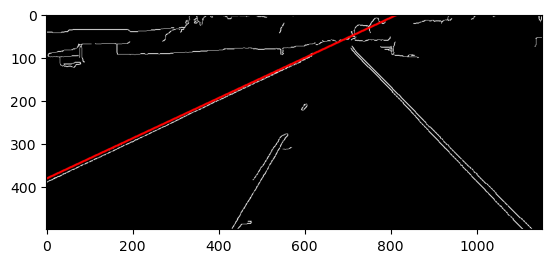

In [28]:
s,e = f_getExtents(a,b,E.shape[0],E.shape[1])
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.line(E2,s,e,(0,0,255),3)
plt.imshow(I[:,:,::-1])

# How to find multiple lines?

In [56]:
def nlargest_indices(arr,n): # recieves an array and returns n maximum vlaues of H
    uniques = np.unique(arr)
    th = uniques(-n)
    return np.where(arr>=th)

In [76]:
n=5 # finding 5 lines
x,y=nlargest_indices(H, n)
plt.subplot(121)
for i in (range(n)):
    best_d,best_theta=x[i],y[i]
    theta=np.deg2rad(best_theta)
    a = -(1/np.tan(theta))
    b = best_d/np.sin(theta)
    s,e = f_getExtents(a,b,E.shape[0],E.shape[1])
    E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
    E3 = np.array(255*E,dtype = np.uint8)
    E2[:,:,0] = E3
    E2[:,:,1] = E3
    E2[:,:,2] = E3
    I = cv2.line(E2,s,e,(0,0,255),3)
    fig,ax=plt.subplots(figsize=(18,19))
    
    ax.imshow(I[:,:,::-1])

TypeError: 'numpy.ndarray' object is not callable